# Assignment 5
## Decision Trees and Random Forests for Regression, Part 1

### About this notebook

The general description and instructions as well as questions for the walk through Part 1 of the task (this notebook) are found in the Assignment description in Canvas!


In [94]:
# YOU DON'T HAVE TO RUN THIS IF EVERYTHING IS ALREADY INSTALLED CORRECTLY
#!pip3 install --upgrade pip
#!pip3 install graphviz
#!pip3 install dtreeviz
#!pip3 install numpy scipy

## Dataset(s)

**Step 0:** First, load the dataset. Ultimately, you should be working with the California housing data, but for quicker test runs, it might help to first start out with the Diabetes data.

In [95]:
#run time 0.8s

from sklearn.datasets import load_diabetes
from sklearn.datasets import fetch_california_housing
from ConceptDataRegr import ConceptDataRegr
from sklearn.model_selection import train_test_split 

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

test_case = 'diabetes'
#test_case = 'california'

if test_case == 'california':
    dataset = fetch_california_housing()
elif test_case == 'diabetes':
    dataset = load_diabetes()
else:
    raise ValueError('Unknown test case')

X = dataset.data
y = dataset.target


**Step 1:** Get some information about the dataset you're looking at

In [96]:
if test_case == 'california' :
    print("target:", list(dataset.target_names))
print("features:", list(dataset.feature_names))
print("description:", dataset.DESCR)


features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
description: .. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of 

**Step 2:** Split the data into train, validation and test sets.

In [97]:
#run time 0.7s

train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15
X = dataset.data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state=0)

## Decision Tree Regressor

Run the cells below and inspect the output. Use the documentation where needed. Be prepared to answer "random" questions posed by the TA.

In [98]:
#run time 0.7s

from sklearn.tree import DecisionTreeRegressor

regressor1 = DecisionTreeRegressor(random_state=0)

**Step 3:** Now let's examine the decision tree. 
Check out [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)
and [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html?highlight=decision+tree)
to learn about those tools.

In [99]:
#run time 1.8s

from sklearn.model_selection import cross_val_score

cross_val_score(regressor1, X_train, y_train, cv=10)

array([-0.02144221,  0.0614295 ,  0.09449354, -0.05130063,  0.36838284,
       -0.55354206, -0.00447535, -0.14397523,  0.25445472,  0.12892033])

In [100]:
#run time 0.3s

regressor1.fit(X_train, y_train)
regressor1.score(X_test, y_test)

-0.057750608640022794

## Decision Tree Parameters

**Step 4:** Let's have a look at two other parameters, max_depth and min_samples_leaf.
How do you interpret the following numbers?

In [101]:
#run time 0.2s

regressor2 = DecisionTreeRegressor(max_depth=1, random_state=0)
cross_val_score(regressor2, X_train, y_train, cv=10)

array([ 0.06376428,  0.14919576, -0.01133969,  0.06887429,  0.25102598,
        0.15290758,  0.28438258,  0.24414713,  0.24351975,  0.20996688])

In [102]:
#run time 0.1s

regressor2.fit(X_train, y_train)
regressor2.score(X_test, y_test)

0.12280882071603205

In [103]:
#run time 1.2s

regressor3 = DecisionTreeRegressor(min_samples_leaf=20, random_state=0)
cross_val_score(regressor3, X_train, y_train, cv=10)

array([0.34323928, 0.58953385, 0.32737132, 0.25473796, 0.49111802,
       0.37323669, 0.52956238, 0.53937286, 0.43288923, 0.46557799])

In [104]:
#run time 0.1s

regressor3.fit(X_train, y_train)
regressor3.score(X_test, y_test)

0.01954166471529928

## Decision Tree Visualization

**Step 5:** The next cells give examples how to visualize regressor2 and regressor3.

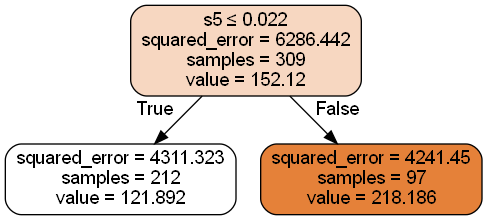

In [105]:
#run time 0.2s

from sklearn import tree
import graphviz
from IPython.display import Image

dot_data = tree.export_graphviz(regressor2, feature_names=dataset.feature_names, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data, format="png") 
graph.render("decision_tree_regressor2")
Image("decision_tree_regressor2.png")

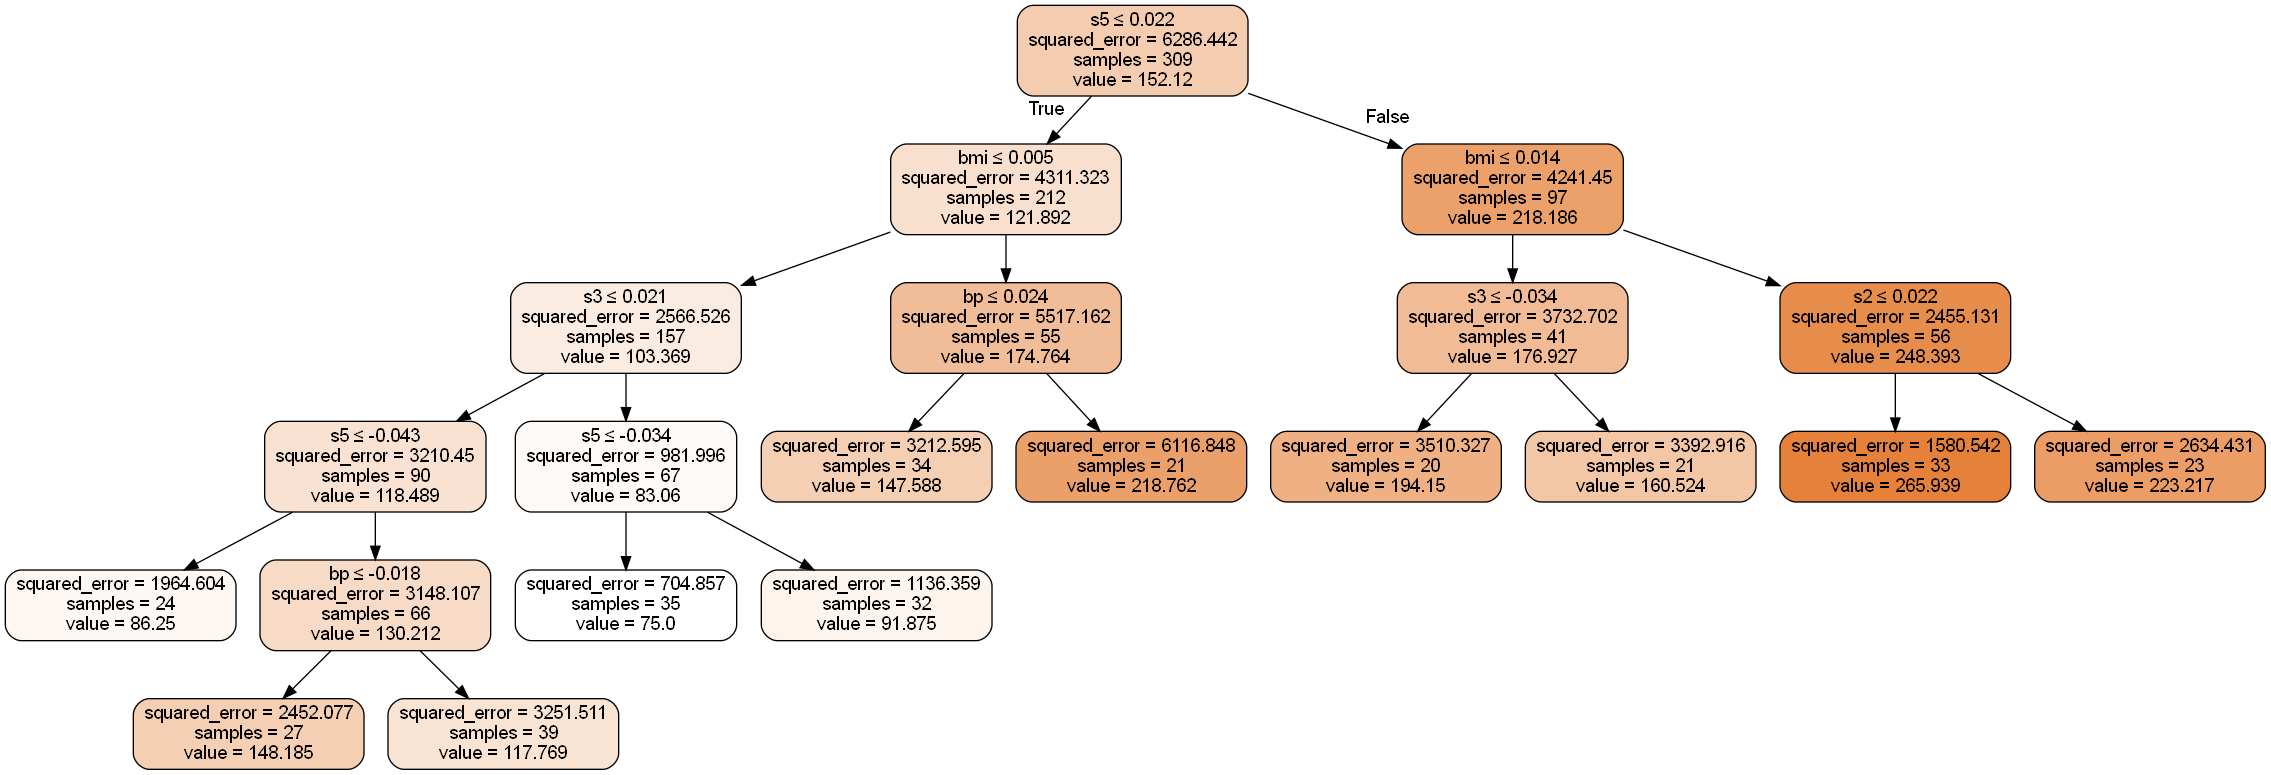

In [106]:
#run time 4.8s

dot_data = tree.export_graphviz(regressor3, feature_names=dataset.feature_names, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data, format="png") 
graph.render("decision_tree_regressor3")
Image("decision_tree_regressor3.png")

**Step 6:** Another nice way to visualize the decision trees nicely is with dtreeviz. To make these plots it takes quite some time, so we recommend to use this visualization tool for trees with few nodes. 

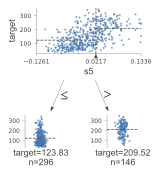

In [107]:
# run time 6.9s

from dtreeviz.trees import dtreeviz

viz = dtreeviz(regressor2, X, y,
                target_name="target",
                feature_names=dataset.feature_names)
viz.view()
# this opens the visualization in a new window. If you want to display the output inside the notebook use:
viz
# if you want to store the output in a file use:
#viz.save("dtreeviz.svg")
# instead

## Explainability

**Step 7:** If you want to visualize (explain) the decision path for one prediction, you can also use dtreeviz:

[-0.04910502 -0.04464164 -0.05686312 -0.04354178 -0.04559945 -0.04327577
  0.00077881 -0.03949338 -0.01189685  0.01549073]


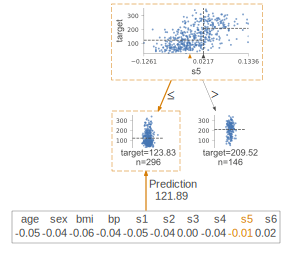

In [108]:
# run time 6.8s

import numpy as np

sample = X_test[np.random.randint(0, len(X_test)),:] # random sample from training
print(sample)
viz = dtreeviz(regressor2, X, y,
                target_name="target",
                feature_names=dataset.feature_names,
                X=sample)
#viz.view()
viz

**Step 8:** For bigger graphs you just show the decision path

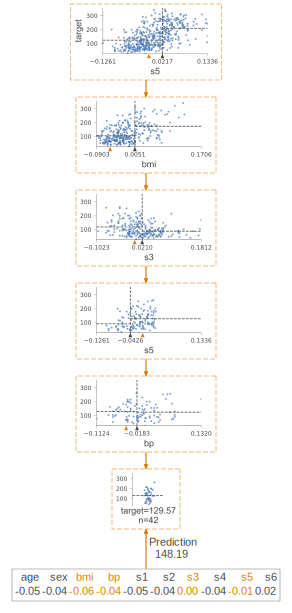

In [109]:
# run time 10.4s

viz = dtreeviz(regressor3, X, y,
                target_name="target",
                feature_names=dataset.feature_names,
                X=sample,
                show_just_path=True)
#viz.view()
viz

**Step 9:** Another option to explain the prediction for big trees is this

In [110]:
# run time 0.1s

from dtreeviz.trees import explain_prediction_path

print(explain_prediction_path(regressor3, sample, feature_names=dataset.feature_names, explanation_type="plain_english"))

bmi < 0.01
bp < -0.02
s3 < 0.02
-0.04 <= s5  < 0.02



## Step 10: Pruning

### Cost Complexity Pruning

A smart way of pruning is to use cost complexity pruning. This method is based on the idea that a tree with a lot of nodes is more likely to overfit than a tree with few nodes. Therefore, we can prune the tree by removing nodes that are not important for the prediction. The cost complexity pruning method uses a parameter $\alpha$ to determine how many nodes to remove. It basically is a tradeoff between having a tree with many nodes that has a small total MSE, vs. a tree with fewer nodes but greater total MSE. The following code shows how to use the cost complexity pruning method.

We find the alphas that change the Decision Tree to be "cut down" and we record the worsening of the MSE.

In [111]:
# run time 0.8s

path = regressor1.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
#print(ccp_alphas)
#print(impurities)

We can then plot the MSE for each $\alpha$.

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

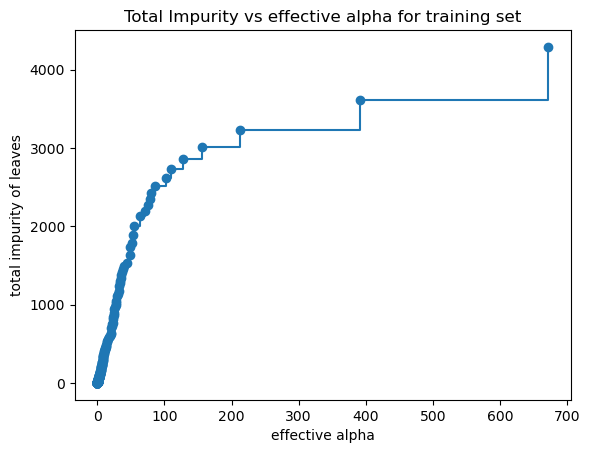

In [112]:
# run time 0.4s

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

You can now train a Decision Tree for each $\alpha$.

In [113]:
# run time 0.2s

regressors = []
for ccp_alpha in ccp_alphas:
    regressor = DecisionTreeRegressor(min_samples_leaf=20, random_state=0, ccp_alpha=ccp_alpha)
    regressor.fit(X_train, y_train)
    regressors.append(regressor)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        regressors[-1].tree_.node_count, ccp_alphas[-1]
    ),
)
if regressors[-1].tree_.node_count == 1:
    print("Removing last node.")
    regressors = regressors[:-1]
    ccp_alphas = ccp_alphas[:-1]

Number of nodes in the last tree is: 1 with ccp_alpha: 1997.0530908365427
Removing last node.


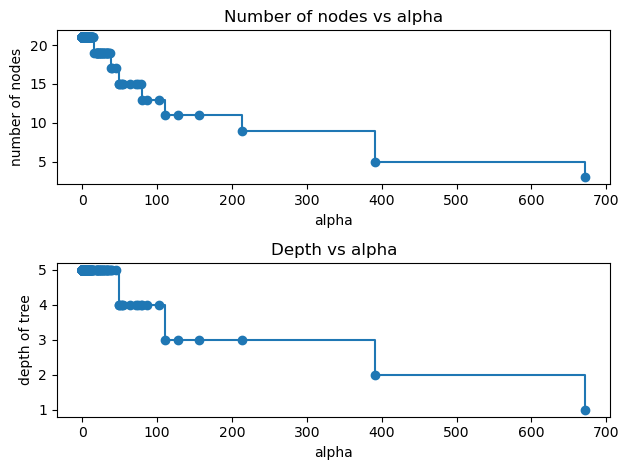

In [114]:
# run time 0.5s

node_counts = [regressor.tree_.node_count for regressor in regressors]
depth = [regressor.tree_.max_depth for regressor in regressors]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

This is a way to get all the scores for each tree

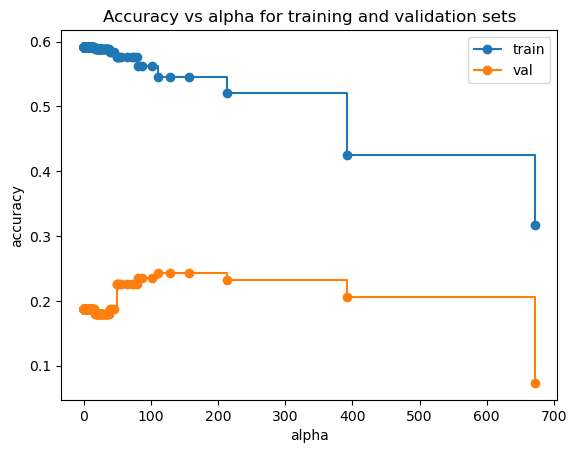

In [115]:
# run time 0.6s

train_scores = [regressor.score(X_train, y_train) for regressor in regressors]
val_scores = [regressor.score(X_val, y_val) for regressor in regressors]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and validation sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker="o", label="val", drawstyle="steps-post")
ax.legend()
plt.show()

The best tree is the one with the highest score.

In [116]:
# run time 0.8s

idx_max = np.argmax(val_scores)
regressor_best = regressors[idx_max]
print("Best alpha: {}".format(ccp_alphas[idx_max]))

Best alpha: 110.08077212251897


In [117]:
# run time 0.7s

regressor_best.score(X_test, y_test)

0.056088365184336575

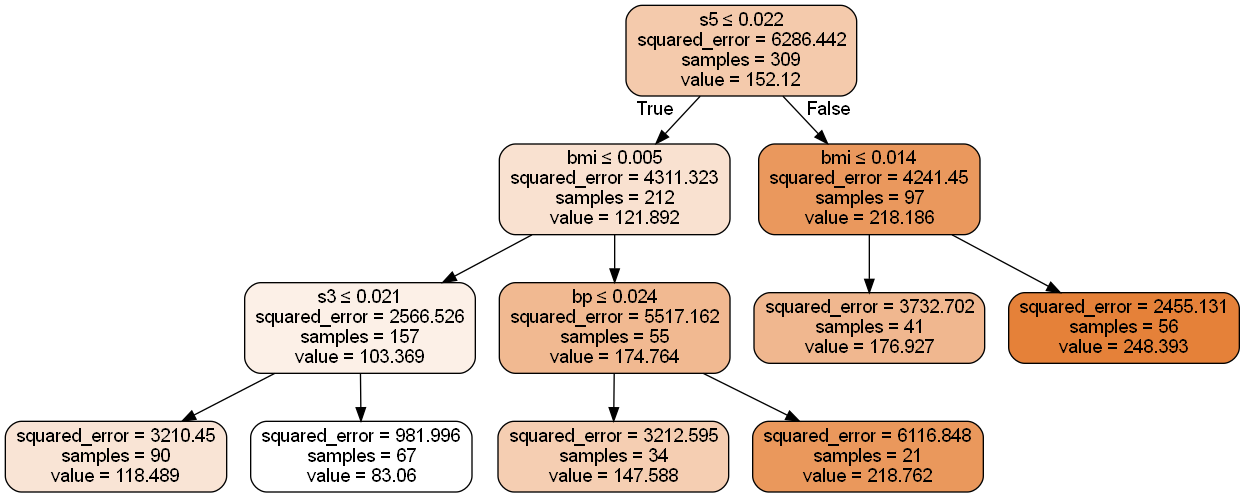

In [118]:
# run time 0.8s

dot_data = tree.export_graphviz(regressor_best, feature_names=dataset.feature_names, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data, format="png") 
graph.render("decision_tree_regressor_best")
Image("decision_tree_regressor_best.png")

In [119]:
print(X_test.shape)
print(y_test.shape)

(67, 10)
(67,)


## Step 11: Ensemble methods: 

Experiment with **at least two methods that are not the VotingRegressor**, which is only an example, and that are **NOT random forests**. Inspect the documentation of the different estimators. Note that you can use regressors as estimators within an ensemble that are themselves based on an ensemble. Below is an **example** for a (tiny) voting ensemble. Visualise your results to be able to discuss them!

VotingRegressor:  0.26277526801120754
BaggingRegressor:  0.3568239990983101
GradientBoosting:  0.21972375048176063
StackingRegressor:  0.35832213413974157


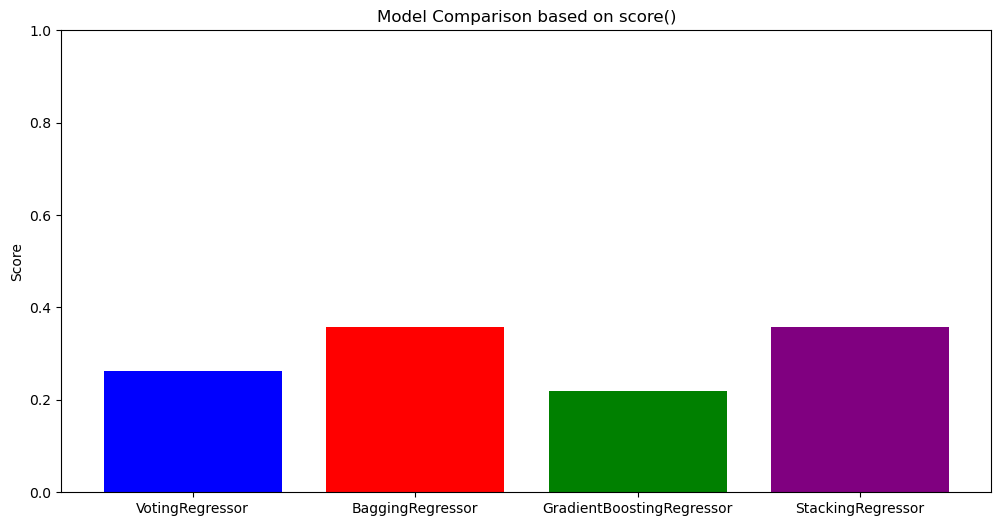

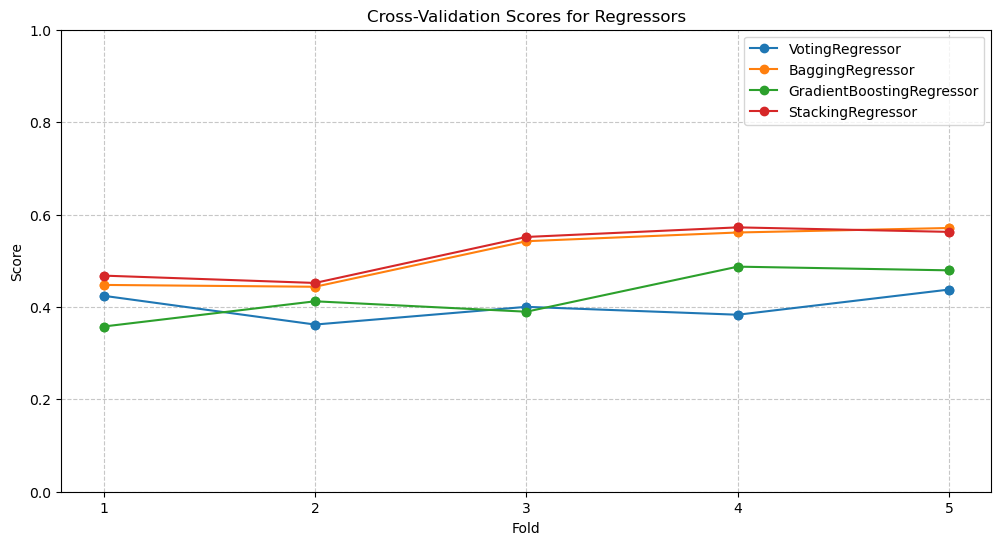

In [120]:
# run time 1.2s
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score

voting=VotingRegressor(estimators=[('lr', LinearRegression()), ('dt', DecisionTreeRegressor())])
voting.fit(X_train, y_train)
voting_score = voting.score(X_test, y_test)
print("VotingRegressor: ", voting_score)


# BaggingRegressor
bagging_regressor = BaggingRegressor(LinearRegression(), n_estimators=10, random_state=42)
bagging_regressor.fit(X_train, y_train)
bagging_score = bagging_regressor.score(X_test, y_test)
print("BaggingRegressor: ", bagging_score)

# GradientBoostingRegressor
gradient_boosting_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gradient_boosting_regressor.fit(X_train, y_train)
gb_score = gradient_boosting_regressor.score(X_test, y_test)
print("GradientBoosting: ", gb_score)

# StackingRegressor with a linear regression meta-estimator
stacking_regressor = StackingRegressor(estimators = [('lr', LinearRegression()), ('bagging', BaggingRegressor(LinearRegression(), n_estimators=10, random_state=42)), ('gb', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42))]
, final_estimator=LinearRegression())
stacking_regressor.fit(X_train, y_train)
stacking_score = stacking_regressor.score(X_test, y_test)
print("StackingRegressor: ", stacking_score)


# Visualize the scores including StackingRegressor
models = ['VotingRegressor', 'BaggingRegressor', 'GradientBoostingRegressor', 'StackingRegressor']
scores = [voting_score, bagging_score, gb_score, stacking_score]

# Visualize the scores
plt.figure(figsize=(12, 6))
plt.bar(models, scores, color=['blue', 'red', 'green', 'purple'])
plt.title('Model Comparison based on score()')
plt.ylabel('Score')
plt.ylim(0, 1)  # Adjust the y-axis limits if necessary
plt.show()

# List of regressors
regressors = [
    ('VotingRegressor', voting),
    ('BaggingRegressor', bagging_regressor),
    ('GradientBoostingRegressor', gradient_boosting_regressor),
    ('StackingRegressor', stacking_regressor)
]
# Perform cross-validation for each regressor
cv_scores = []
num_folds = 5  # You can adjust the number of folds
fold_labels = list(range(1, num_folds + 1))

for i, (name, regressor) in enumerate(regressors):
    scores = cross_val_score(regressor, X_train, y_train, cv=num_folds, scoring='r2')
    cv_scores.append((name, scores))
    
# Visualize the cross-validation scores with a scatter plot and lines
plt.figure(figsize=(12, 6))
for name, scores in cv_scores:
    plt.scatter(fold_labels, scores)
    plt.plot(fold_labels, scores, label=name, linestyle='-', marker='o')

plt.title('Cross-Validation Scores for Regressors')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.legend()
plt.xticks(fold_labels)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, 1)  # Adjust the y-axis limits if necessary
plt.show()

## Step 12: Boosting!

Experiment with an AdaBoostRegressor and interpret the results. 

c:\Users\jonat\anaconda3\envs\EDAN96\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\jonat\anaconda3\envs\EDAN96\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\jonat\anaconda3\envs\EDAN96\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\jonat\anaconda3\envs\EDAN96\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\jonat\anaconda3\envs\EDAN96\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed 

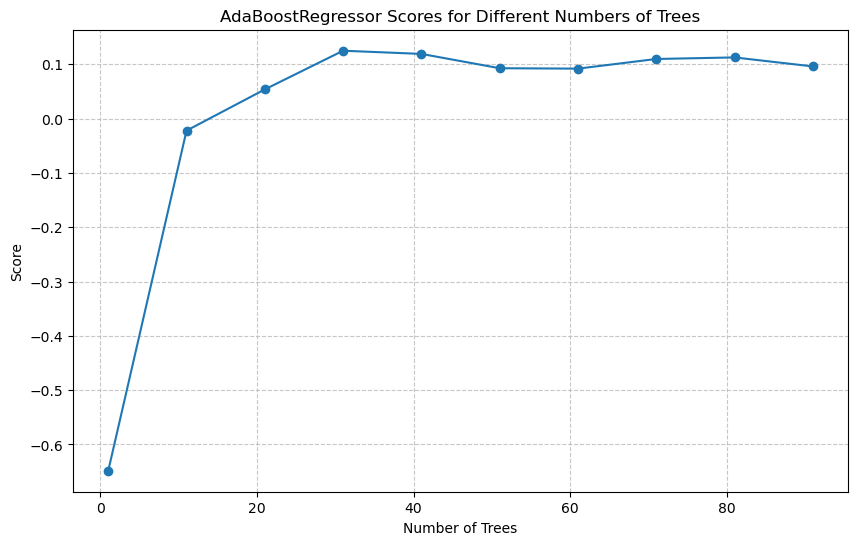

In [121]:
# run time 0.2s

# https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_regression.html#sphx-glr-auto-examples-ensemble-plot-adaboost-regression-py
from sklearn.ensemble import AdaBoostRegressor

number_of_trees = 3 #put something suitable in here
boosting = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=number_of_trees, random_state=0)
boosting.fit(X_train, y_train)
boosting.score(X_test, y_test)

# Set a range of values for the number of trees
num_trees_range = list(range(1, 100, 10))

# Initialize a list to store the scores
boosting_scores = []

# Iterate over different numbers of trees
for num_trees in num_trees_range:
    boosting = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=num_trees, random_state=0)
    boosting.fit(X_train, y_train)
    score = boosting.score(X_test, y_test)
    boosting_scores.append(score)

# Visualize the scores with a line plot
plt.figure(figsize=(10, 6))
plt.plot(num_trees_range, boosting_scores, marker='o')
plt.title('AdaBoostRegressor Scores for Different Numbers of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



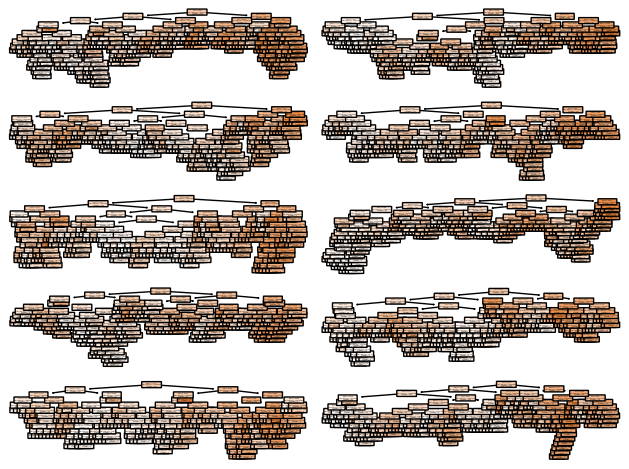

In [122]:
# run time 1m 13s to 3m

fig, ax = plt.subplots(5,2)
for i, axi in enumerate(ax.flat):
    axi.set_title("Tree {}".format(i))
    tree.plot_tree(boosting.estimators_[i], ax=axi, feature_names=dataset.feature_names, filled=True, rounded=True)
fig.tight_layout()

## Step 13: Random Forests

Experiment with different parameters for the RF-Regressor. Test at least two different parameter sets.

In [123]:
from sklearn.ensemble import RandomForestRegressor

number_of_trees = 10
forest = RandomForestRegressor(n_estimators=number_of_trees, random_state=0)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

from sklearn.ensemble import RandomForestRegressor

# Initial RandomForestRegressor with default parameters
number_of_trees = 10
forest_default = RandomForestRegressor(n_estimators=number_of_trees, random_state=0)
score_default = forest_default.fit(X_train, y_train).score(X_test, y_test)
print(f"Default Score: {score_default}")

# Experiment with different parameters
params_set1 = {'n_estimators': 50, 'max_depth': 5, 'min_samples_split': 2, 'random_state': 0}
params_set2 = {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 5, 'random_state': 0}

forest_set1 = RandomForestRegressor(**params_set1)
set1 = forest_set1.fit(X_train, y_train)
score_set1 = set1.score(X_test, y_test)
print(f"Score for Parameter Set 1: {score_set1}")

forest_set2 = RandomForestRegressor(**params_set2)
set2 = forest_set2.fit(X_train, y_train)
score_set2 = set2.score(X_test, y_test)
print(f"Score for Parameter Set 2: {score_set2}")

if score_set2 > score_set1:
    forest = set2
else:
    forest = set1


Default Score: 0.06928596765881534
Score for Parameter Set 1: 0.22973151811292503
Score for Parameter Set 2: 0.21591042524376358


In [124]:
for treeid in range(number_of_trees):
    dot_data = tree.export_graphviz(forest.estimators_[treeid], feature_names=dataset.feature_names, out_file=None, filled=True, rounded=True, special_characters=True)
    graph = graphviz.Source(dot_data, format="png") 
    graph.render("forest_treeid"+str(treeid))

In [125]:
# run time 1m 23s to 3m

fig, ax = plt.subplots(5,2)
for i, axi in enumerate(ax.flat):
    axi.set_title("Tree {}".format(i))
    tree.plot_tree(forest.estimators_[i], ax=axi, feature_names=dataset.feature_names, filled=True, rounded=True)
fig.tight_layout()

In [ ]:
minSamplesLeaves, minSamplesSplit, maxDepths, stopMSE = 10, 2, 6, 0
sk_regressor = DecisionTreeRegressor(min_samples_leaf=minSamplesLeaves, max_depth =maxDepths,   random_state=0)
#cross_val_score(regressor3, X_train, y_train, cv=10)

sk_regressor.fit(X_train, y_train)

print("Train: ", sk_regressor.score(X_train, y_train))
print("Test: ", sk_regressor.score(X_test, y_test))

Train:  0.6703892138193925
Test:  0.6296521677030931
